In [4]:
#Document qui vise à explorer le dataset de la base de données de KBO

#Importation des librairies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Chemin relatif vers le dossier de données
data_dir = os.path.join('..', '..', 'data')

# Chemins complets vers chaque fichier CSV
activity_path = os.path.join(data_dir, 'activity.csv')
address_path = os.path.join(data_dir, 'address.csv')
branch_path = os.path.join(data_dir, 'branch.csv')
code_path = os.path.join(data_dir, 'code.csv')
contact_path = os.path.join(data_dir, 'contact.csv')
denomination_path = os.path.join(data_dir, 'denomination.csv')
enterprise_path = os.path.join(data_dir, 'enterprise.csv')
establishment_path = os.path.join(data_dir, 'establishment.csv')
meta_path = os.path.join(data_dir, 'meta.csv')

In [7]:
# Chargement des datasets
activity_df = pd.read_csv(activity_path)
address_df = pd.read_csv(address_path)
branch_df = pd.read_csv(branch_path)
code_df = pd.read_csv(code_path)
contact_df = pd.read_csv(contact_path)
denomination_df = pd.read_csv(denomination_path)
enterprise_df = pd.read_csv(enterprise_path)
establishment_df = pd.read_csv(establishment_path)
meta_df = pd.read_csv(meta_path)

C:\Users\Nawfel\AppData\Local\Temp\ipykernel_30320\122633595.py:3: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  address_df = pd.read_csv(address_path)


In [8]:
# Afficher les premières lignes de chaque dataset pour vérifier qu'ils sont chargés correctement
print("Activity Dataset:")
print(activity_df.head())

print("\nAddress Dataset:")
print(address_df.head())

print("\nBranch Dataset:")
print(branch_df.head())

print("\nCode Dataset:")
print(code_df.head())

print("\nContact Dataset:")
print(contact_df.head())

print("\nDenomination Dataset:")
print(denomination_df.head())

print("\nEnterprise Dataset:")
print(enterprise_df.head())

print("\nEstablishment Dataset:")
print(establishment_df.head())

print("\nMeta Dataset:")
print(meta_df.head())

Activity Dataset:
   EntityNumber  ActivityGroup  NaceVersion  NaceCode Classification
0  0200.065.765              6         2008     84130           MAIN
1  0200.065.765              1         2008     41101           MAIN
2  0200.065.765              1         2003     70111           MAIN
3  0200.068.636              6         2008     36000           MAIN
4  0200.068.636              1         2008     36000           MAIN

Address Dataset:
   EntityNumber TypeOfAddress CountryNL CountryFR Zipcode  \
0  0200.065.765          REGO       NaN       NaN    9070   
1  0200.068.636          REGO       NaN       NaN    9000   
2  0200.171.970          REGO       NaN       NaN    9000   
3  0200.245.711          REGO       NaN       NaN    9500   
4  0200.305.493          REGO       NaN       NaN    9520   

        MunicipalityNL       MunicipalityFR        StreetNL        StreetFR  \
0         Destelbergen         Destelbergen   Panhuisstraat   Panhuisstraat   
1                 Gent   

In [9]:

# Fonction pour obtenir les informations de base d'une entreprise
def get_company_info(entity_number):
    company_info = {}
    
    # Activités
    activities = activity_df[activity_df['EntityNumber'] == entity_number]
    company_info['activities'] = activities[['NaceCode', 'Classification']].to_dict(orient='records')
    
    # Adresse
    addresses = address_df[address_df['EntityNumber'] == entity_number]
    company_info['addresses'] = addresses[['TypeOfAddress', 'CountryNL', 'Zipcode', 'MunicipalityNL', 'StreetNL', 'HouseNumber']].to_dict(orient='records')
    
    # Branches
    branches = branch_df[branch_df['EnterpriseNumber'] == entity_number]
    company_info['branches'] = branches[['Id', 'StartDate']].to_dict(orient='records')
    
    # Contacts
    contacts = contact_df[contact_df['EntityNumber'] == entity_number]
    company_info['contacts'] = contacts[['ContactType', 'Value']].to_dict(orient='records')
    
    # Dénomination
    denomination = denomination_df[denomination_df['EntityNumber'] == entity_number]
    company_info['denomination'] = denomination[['Language', 'Denomination']].to_dict(orient='records')
    
    # Entreprise
    enterprise = enterprise_df[enterprise_df['EnterpriseNumber'] == entity_number]
    if not enterprise.empty:
        company_info['enterprise'] = enterprise.iloc[0].to_dict()
    
    # Établissements
    establishments = establishment_df[establishment_df['EnterpriseNumber'] == entity_number]
    company_info['establishments'] = establishments[['EstablishmentNumber', 'StartDate']].to_dict(orient='records')
    
    return company_info

# Exemple d'utilisation
entity_number = '0200.065.765'
company_info = get_company_info(entity_number)
print(company_info)

{'activities': [{'NaceCode': 84130, 'Classification': 'MAIN'}, {'NaceCode': 41101, 'Classification': 'MAIN'}, {'NaceCode': 70111, 'Classification': 'MAIN'}], 'addresses': [{'TypeOfAddress': 'REGO', 'CountryNL': nan, 'Zipcode': '9070', 'MunicipalityNL': 'Destelbergen', 'StreetNL': 'Panhuisstraat', 'HouseNumber': '1'}], 'branches': [], 'contacts': [], 'denomination': [{'Language': 2, 'Denomination': 'Intergemeentelijke Vereniging Veneco'}, {'Language': 2, 'Denomination': 'Veneco'}], 'enterprise': {'EnterpriseNumber': '0200.065.765', 'Status': 'AC', 'JuridicalSituation': 0, 'TypeOfEnterprise': 2, 'JuridicalForm': 416.0, 'JuridicalFormCAC': nan, 'StartDate': '09-08-1960'}, 'establishments': [{'EstablishmentNumber': '2.251.273.097', 'StartDate': '01-12-2015'}]}


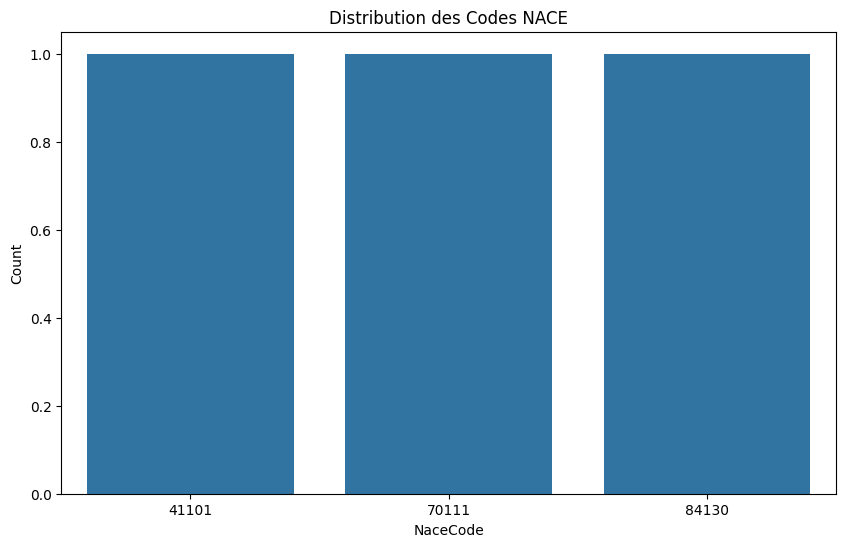

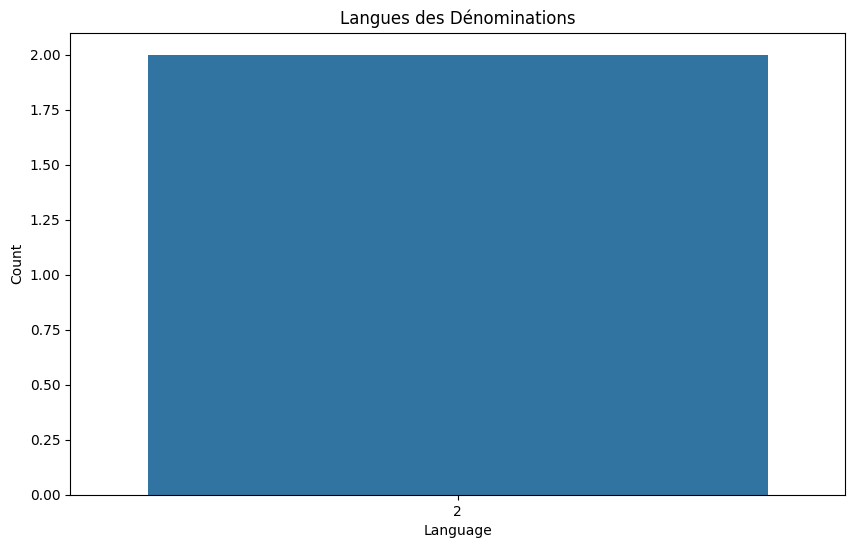